In [93]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.5251 - accuracy: 0.4501 - val_loss: 0.4515 - val_accuracy: 0.4839
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.4211 - accuracy: 0.4890 - val_loss: 0.4049 - val_accuracy: 0.4879
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3943 - accuracy: 0.4922 - val_loss: 0.3866 - val_accuracy: 0.4918
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3767 - accuracy: 0.4952 - val_loss: 0.3706 - val_accuracy: 0.4937
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3624 - accuracy: 0.4974 - val_loss: 0.3583 - val_accuracy: 0.4966


1. Add one more hidden layer to autoencoder

In [94]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# adding a hidden layer
HiddenLayer=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(HiddenLayer)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',)
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder1.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.5022 - val_loss: 0.4130
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.3922 - val_loss: 0.3795
Epoch 3/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.3647 - val_loss: 0.3542
Epoch 4/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.3444 - val_loss: 0.3401
Epoch 5/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.3337 - val_loss: 0.3338


2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Compare the same test data before reconstruction using Matplotlib


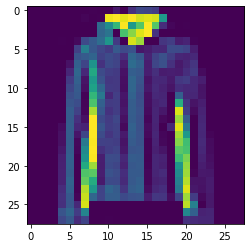

In [95]:
# prediction
prediction = autoencoder1.predict(x_test[[6],:])

from matplotlib import pyplot as plt
# Input Image
plt.imshow(x_test[6].reshape(28,28))
plt.show()

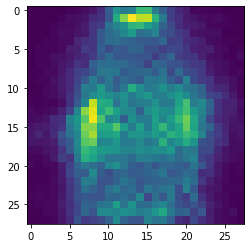

In [96]:
# Reconstructed Image
plt.imshow(prediction[0].reshape(28,28))
plt.show()

3. Repeat the question 2 on the denoisening autoencoder

In [97]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3616 - accuracy: 0.4975 - val_loss: 0.3470 - val_accuracy: 1.2755e-07
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3532 - accuracy: 0.4990 - val_loss: 0.3384 - val_accuracy: 1.2755e-07
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3463 - accuracy: 0.5003 - val_loss: 0.3313 - val_accuracy: 1.2755e-07
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3408 - accuracy: 0.5012 - val_loss: 0.3254 - val_accuracy: 1.2755e-07
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3363 - accuracy: 0.5019 - val_loss: 0.3205 - val_accuracy: 1.2755e-07
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3324 - accuracy: 0.5025 - val_loss: 0.3163 - val_accuracy: 1.2755e-07
Epoch 7/10
60000/60000 [====================

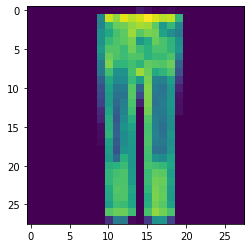

In [98]:
# prediction
prediction1 = autoencoder.predict(x_test_noisy[[15],:])

# Input Image
plt.imshow(x_test[15].reshape(28,28))
plt.show()

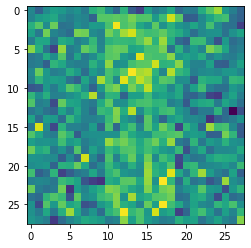

In [99]:
# After applying noise to data
plt.imshow(x_test_noisy[15].reshape(28,28))
plt.show()


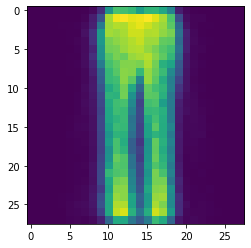

In [100]:
# Reconstructed Image
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

4. plot loss and accuracy using the history object


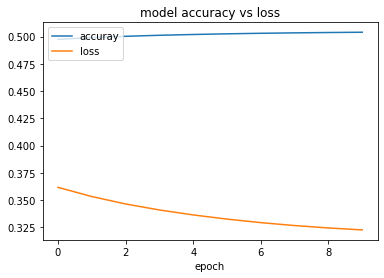

In [101]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

Bonus: Visualize the compressed version of the input data in the middle layer

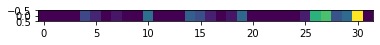

In [102]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

encoded_imgs = encoder.predict(x_test[[2],:])

plt.imshow(encoded_imgs)
plt.show()